<a href="https://colab.research.google.com/github/leomanfree/Creative_Fork_FastAI_LearnSprint/blob/main/Alchemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!unzip -q alchemy_dataset.zip


# -------------------------------
# STEP 1: Setup and Imports
# -------------------------------

In [45]:
from fastai.vision.all import *
import os


path = Path('alchemy_dataset')
path.ls()

(#20) [Path('alchemy_dataset/Element_Earth'),Path('alchemy_dataset/Alchemical_Tincture'),Path('alchemy_dataset/Element_Fire'),Path('alchemy_dataset/fire'),Path('alchemy_dataset/Element_Air'),Path('alchemy_dataset/silver'),Path('alchemy_dataset/Alchemical_Solution'),Path('alchemy_dataset/salt'),Path('alchemy_dataset/water'),Path('alchemy_dataset/gold'),Path('alchemy_dataset/Alchemical_Gold'),Path('alchemy_dataset/mercury'),Path('alchemy_dataset/alchemy_dataset_final'),Path('alchemy_dataset/sulfur'),Path('alchemy_dataset/Alchemical_Sublimation'),Path('alchemy_dataset/Alchemical_Lead'),Path('alchemy_dataset/Element_Water'),Path('alchemy_dataset/Alchemical_Silver'),Path('alchemy_dataset/air'),Path('alchemy_dataset/earth')]

# -------------------------------
# STEP 2: Define Path and Verify
# -------------------------------

In [46]:
path = Path('alchemy_dataset')
path.ls()

(#20) [Path('alchemy_dataset/Element_Earth'),Path('alchemy_dataset/Alchemical_Tincture'),Path('alchemy_dataset/Element_Fire'),Path('alchemy_dataset/fire'),Path('alchemy_dataset/Element_Air'),Path('alchemy_dataset/silver'),Path('alchemy_dataset/Alchemical_Solution'),Path('alchemy_dataset/salt'),Path('alchemy_dataset/water'),Path('alchemy_dataset/gold'),Path('alchemy_dataset/Alchemical_Gold'),Path('alchemy_dataset/mercury'),Path('alchemy_dataset/alchemy_dataset_final'),Path('alchemy_dataset/sulfur'),Path('alchemy_dataset/Alchemical_Sublimation'),Path('alchemy_dataset/Alchemical_Lead'),Path('alchemy_dataset/Element_Water'),Path('alchemy_dataset/Alchemical_Silver'),Path('alchemy_dataset/air'),Path('alchemy_dataset/earth')]

# -------------------------------
# STEP 3: Create DataLoaders
# -------------------------------

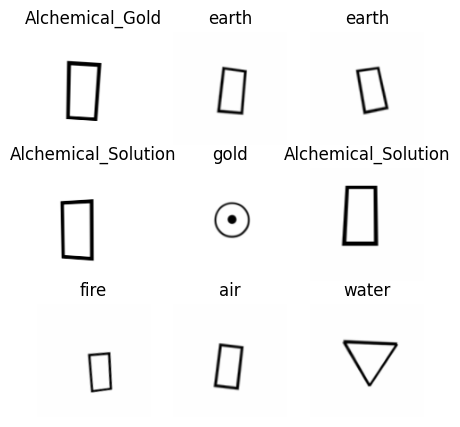

In [60]:
dls = ImageDataLoaders.from_folder(
    path,
    train='.',  # tutte le sottocartelle
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(128),
    batch_tfms=aug_transforms(mult=1.0)
)

dls.show_batch(max_n=9, figsize=(5,5))

# -------------------------------
# STEP 4: Define and Train Model
# -------------------------------

In [61]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,4.717673,5.617047,0.035714,00:06


epoch,train_loss,valid_loss,accuracy,time
0,5.063960,5.121876,0.000000,00:07
1,4.962533,4.541635,0.000000,00:08
2,4.488281,4.199738,0.000000,00:08


# -------------------------------
# STEP 5: Export Model (optional)
# -------------------------------

In [62]:
learn.export('alchemy_classifier.pkl')

In [63]:
img = PILImage.create('alchemy_dataset/Alchemical_Gold/Alchemical_Gold_0.png')
learn.predict(img)


('Alchemical_Solution',
 tensor(3),
 tensor([0.0250, 0.0109, 0.0036, 0.3073, 0.0268, 0.0912, 0.0563, 0.0735, 0.0332,
         0.0042, 0.0467, 0.0256, 0.0045, 0.0038, 0.0225, 0.1734, 0.0016, 0.0502,
         0.0398]))

In [64]:
pred_class, pred_idx, probs = learn.predict(img)


In [65]:
print(f"🔮 Predicted: {pred_class}")
print(f"📊 Probability: {probs[pred_idx]:.4f}")

🔮 Predicted: Alchemical_Solution
📊 Probability: 0.3073


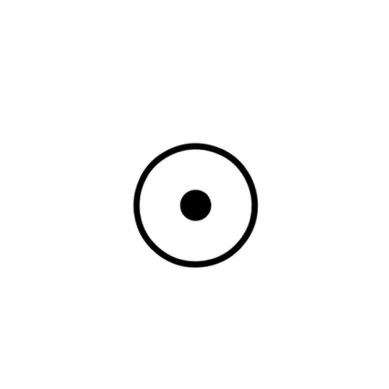

In [73]:
import matplotlib.pyplot as plt

img = Image.open("alchemy_dataset/gold/gold_2.png")
plt.imshow(img)
plt.axis('off')
plt.show()


In [72]:
from PIL import Image

img = Image.open("alchemy_dataset/gold/gold_2.png")
img.show()


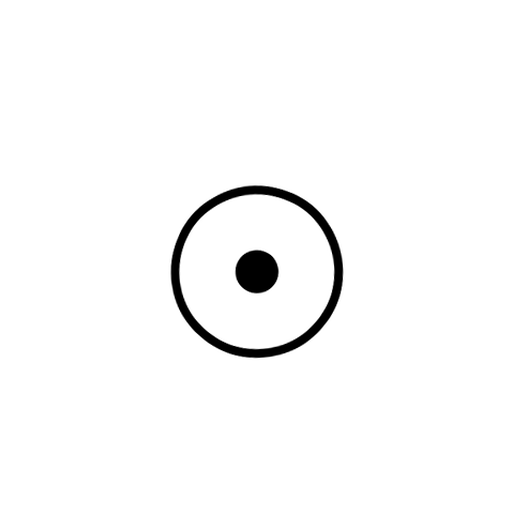

In [75]:
from IPython.display import Image as IPImage, display

display(IPImage("alchemy_dataset/gold/gold_2.png"))


In [71]:
from PIL import Image
